# Análise de KNN para Classificação de Frutas

# 1. Importando as Bibliotecas Necessárias

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")


# 2. Criando um Conjunto de Dados Sintético
Vamos criar um conjunto de dados sintético onde o objetivo é descobrir se a fruta está madura ou verde com base no peso e no diâmetro.

In [ ]:
# Criando um conjunto de dados sintético com valores positivos
np.random.seed(0)  # Para garantir a reprodutibilidade

# Parâmetros para dados positivos
n_samples = 200
mean_positive = 5
std_positive = 2

# Gerando dados sintéticos positivos
peso = np.random.normal(loc=mean_positive, scale=std_positive, size=n_samples)
diamentro = np.random.normal(loc=mean_positive, scale=std_positive, size=n_samples)

# Garantindo que os valores sejam positivos
peso = np.abs(peso)
diamentro = np.abs(diamentro)

# Adicionando ruído aos dados
ruido_peso = np.random.normal(loc=0, scale=0.5, size=n_samples)  # Ruído para peso
ruido_diamentro = np.random.normal(loc=0, scale=0.5, size=n_samples)  # Ruído para diâmetro

peso += ruido_peso
diamentro += ruido_diamentro

# Gerando rótulos de classe (0 = Verde, 1 = Madura) com base em uma condição
y = (peso + diamentro > mean_positive * 2).astype(int)

# Criando o DataFrame para visualização
df = pd.DataFrame({
    'Peso': peso,
    'Diâmetro': diamentro,
    'Madura': y
})

# Mostrando as primeiras linhas do DataFrame
print(df.head())



       Peso  Diâmetro  Madura
0  8.228778  3.486422       1
1  5.242366  4.729901       0
2  7.340808  6.727135       1
3  9.659933  6.429579       1
4  7.850847  5.577282       1


# 3. Dividindo os Dados em Conjunto de Treino e Teste

In [ ]:
# Dividindo os dados em conjuntos de treino e teste
X = df[['Peso', 'Diâmetro']]
y = df['Madura']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 4. Treinando o Algoritmo KNN

In [ ]:
# Treinando o classificador KNN
k = 5  # Número de vizinhos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

# 5. Testando o Algoritmo e Avaliando o Desempenho

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.88      0.94        25

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60

Matriz de Confusão:
[[35  0]
 [ 3 22]]


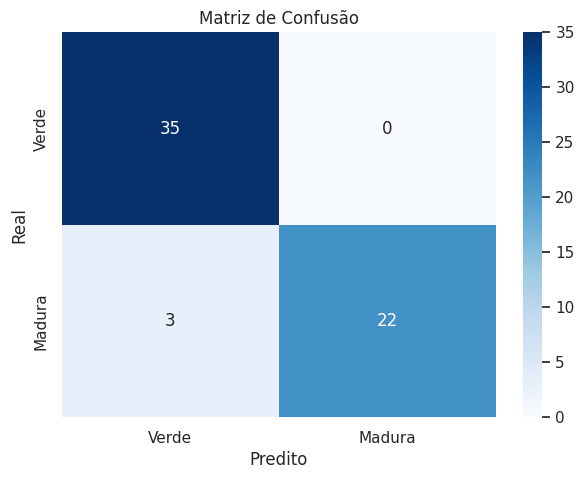

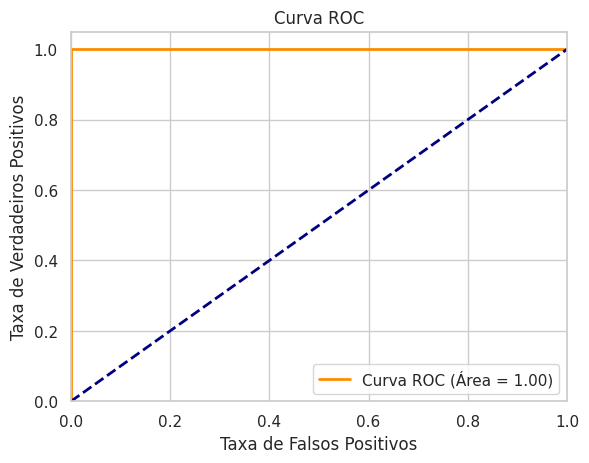

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliando o desempenho
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Plotando a Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Verde', 'Madura'], yticklabels=['Verde', 'Madura'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Curva ROC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# 6. Entrada do Usuário para Previsão

In [ ]:
# Função para prever se a fruta está madura ou verde
def prever_fruta(peso, diamentro):
    predicao = knn.predict([[peso, diamentro]])
    if predicao[0] == 1:
        return "Madura"
    else:
        return "Verde"

# Exemplo de entrada do usuário
peso = float(input("Digite o peso da fruta: "))
diamentro = float(input("Digite o diâmetro da fruta: "))

# Previsão
resultado = prever_fruta(peso, diamentro)
print(f"A fruta está: {resultado}")


Digite o peso da fruta: 15
Digite o diâmetro da fruta: 8
A fruta está: Madura


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Digite o peso da fruta: 15
Digite o diâmetro da fruta: 8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


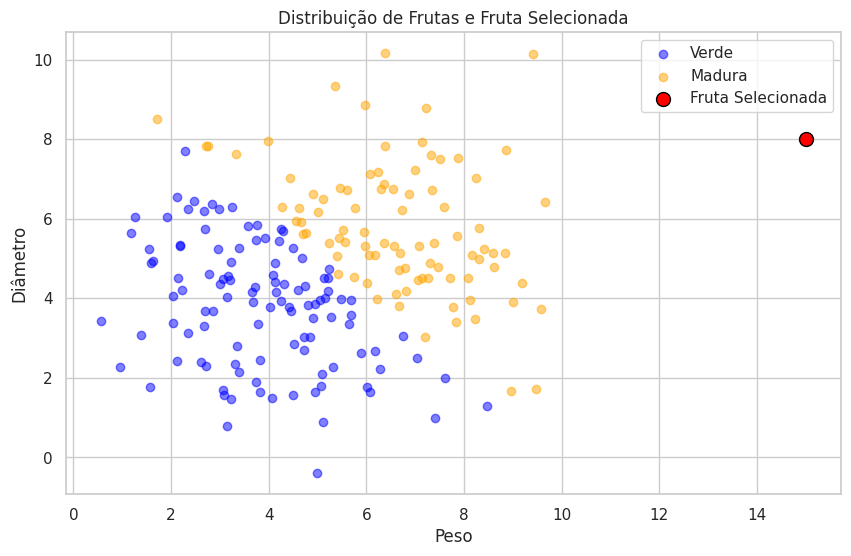

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que os dados e o modelo KNN já estejam definidos como:
# df (DataFrame com os dados das frutas), knn (modelo treinado)

# Função para prever e plotar a fruta selecionada
def plot_dados_com_fruta_selecionada(peso_usuario, diamentro_usuario, df, knn):
    # Fazendo a previsão com os dados do usuário
    predicao_usuario = knn.predict([[peso_usuario, diamentro_usuario]])[0]
    cor_usuario = 'red' if predicao_usuario == 1 else 'green'

    # Criando o gráfico
    plt.figure(figsize=(10, 6))

    # Plotando os dados
    plt.scatter(df[df['Madura'] == 0]['Peso'], df[df['Madura'] == 0]['Diâmetro'], color='blue', label='Verde', alpha=0.5)
    plt.scatter(df[df['Madura'] == 1]['Peso'], df[df['Madura'] == 1]['Diâmetro'], color='orange', label='Madura', alpha=0.5)

    # Plotando a fruta selecionada pelo usuário
    plt.scatter(peso_usuario, diamentro_usuario, color=cor_usuario, s=100, edgecolor='black', label='Fruta Selecionada')

    # Adicionando rótulos e título
    plt.xlabel('Peso')
    plt.ylabel('Diâmetro')
    plt.title('Distribuição de Frutas e Fruta Selecionada')
    plt.legend()
    plt.grid(True)

    # Mostrando o gráfico
    plt.show()

# Exemplo de entrada do usuário (substitua por valores reais ou obtenha da entrada do usuário)
peso_usuario = float(input("Digite o peso da fruta: "))
diamentro_usuario = float(input("Digite o diâmetro da fruta: "))

# Supondo que o DataFrame `df` e o classificador `knn` já estejam carregados e treinados
# df = pd.DataFrame(...)
# knn = KNeighborsClassifier(...)
# knn.fit(...)

# Plotando os dados com a fruta selecionada
plot_dados_com_fruta_selecionada(peso_usuario, diamentro_usuario, df, knn)


## Conclusão

Neste notebook, implementamos o algoritmo K-Nearest Neighbors (KNN) para classificar frutas como maduras ou verdes com base no peso e diâmetro. Aqui estão os principais resultados e observações:

1. **Métricas de Desempenho**:
   - **Acurácia**: Avaliamos a acurácia, precisão, revocação e F1-score do modelo. A acurácia fornece uma visão geral do desempenho do modelo.
   - **Matriz de Confusão**: A matriz de confusão nos ajuda a entender o número de previsões corretas e incorretas.
   - **Curva ROC**: A curva ROC e a AUC (Área Sob a Curva) fornecem uma visão da capacidade do modelo em classificar corretamente as classes positivas e negativas.

2. **Entrada do Usuário**:
   - Criamos uma função que permite ao usuário inserir o peso e o diâmetro de uma fruta e obter uma previsão sobre se a fruta está madura ou verde.

Em resumo, o KNN mostrou-se eficiente para a tarefa de classificação com um conjunto de dados sintético. As métricas de avaliação nos proporcionaram uma compreensão clara da eficácia do modelo. O modelo pode ser aprimorado e ajustado conforme necessário, dependendo do desempenho e das necessidades específicas dos dados reais.

Para otimizar o modelo, é possível experimentar diferentes valores para \( k \) e explorar outras técnicas de pré-processamento dos dados.
